In [1]:
import sys

sys.path.append("/home/ptbadia/code/tfg/tfg_ttcross")

In [2]:
from u1link.u11link import ObservablesU11 as obs
from u1link.u11link import U11linkModel as u11
from u1link.u11link import U1NlinkModel as u1n
from tt_cross.src.integrators import ttrc_integrator, greedy_cross_integrator, simple_mc
import matplotlib.pyplot as plt
import numpy as np
from tt_cross.src.functions import *

### Expected value of sum of polyakov loops on 10 independent U(1) links

In [3]:
y_ttrc = [[], [], []]

mu = np.linspace(0, 8, 20)
beta = [1.0, 2.0, 3.0]
k = 0.5
model = u1n()

link_count = 10


def one(x, **kwargs):
    return 1


for ind, b in enumerate(beta):
    for m in mu:

        def normalization_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one)

        def expectation_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.polyakov_loop)

        normalization = ttrc_integrator(
            func=normalization_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=10,
            sweeps=3,
            initial_bond_guess=2,
            max_bond=10,
            maxvol_tol=1e-5,
            truncation_tol=1e-10,
            is_f_complex=True,
        ).integrate()

        expectation = ttrc_integrator(
            func=expectation_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=10,
            sweeps=3,
            initial_bond_guess=2,
            max_bond=10,
            maxvol_tol=1e-5,
            truncation_tol=1e-10,
            is_f_complex=True,
        ).integrate()

        y_ttrc[ind].append(expectation / normalization)

Initialization done after time: 0.015653610229492188 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.02925729751586914 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.020088672637939453 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.032794952392578125 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.032958269119262695 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.03278160095214844 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.032279014587402344 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.040940284729003906 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.049101829528808594 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.029946327209472656 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done af

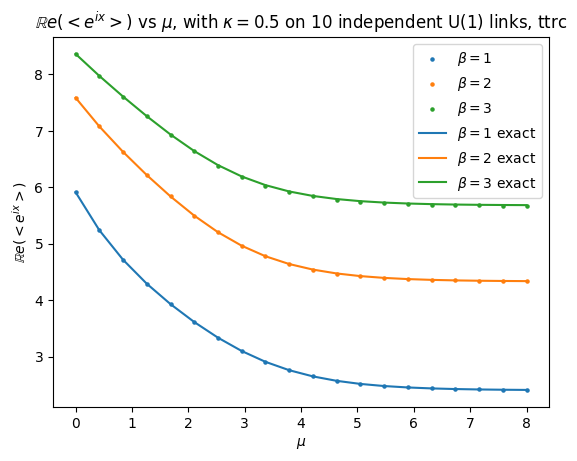

In [4]:
import matplotlib.pyplot as plt

y_1_exact = [link_count * obs.exp_polyakov_loop(beta=1, mu=m, k=k) for m in mu]
y_2_exact = [link_count * obs.exp_polyakov_loop(beta=2, mu=m, k=k) for m in mu]
y_3_exact = [link_count * obs.exp_polyakov_loop(beta=3, mu=m, k=k) for m in mu]


plt.scatter(mu, np.real(y_ttrc[0]), label=r"$\beta = 1$", s=5)
plt.scatter(mu, np.real(y_ttrc[1]), label=r"$\beta = 2$", s=5)
plt.scatter(mu, np.real(y_ttrc[2]), label=r"$\beta = 3$", s=5)

plt.plot(mu, np.real(y_1_exact), label=r"$\beta = 1$ exact")
plt.plot(mu, np.real(y_2_exact), label=r"$\beta = 2$ exact")
plt.plot(mu, np.real(y_3_exact), label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu$")
plt.ylabel(r"$\mathbb{R}e(<e^{ix}>)$")
plt.title(r"$\mathbb{R}e(<e^{ix}>)$ vs $\mu$, with $\kappa = 0.5$ on 10 independent U(1) links, ttrc")
plt.legend()
plt.show()

In [8]:
y_greedy = [[], [], []]

for ind, b in enumerate(beta):
    for m in mu:

        def normalization_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one)

        def expectation_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.polyakov_loop)

        try:
            normalization = greedy_cross_integrator(
                func=normalization_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=20,
                sweeps=3,
                max_bond=10,
                pivot_finder_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            expectation = greedy_cross_integrator(
                func=expectation_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=20,
                sweeps=3,
                max_bond=10,
                pivot_finder_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            y_greedy[ind].append(expectation / normalization)
        except:
            y_greedy[ind].append(np.nan)

Initialization done after time: 0.0013432502746582031 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.00036144256591796875 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.00042724609375 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0003638267517089844 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.0010442733764648438 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.00033736228942871094 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.00067901611328125 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0004076957702636719 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0008931159973144531 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0004296302795410156 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.0010859966278076172 seconds and 1 tries.
Sweep 1
Initialization done after ti

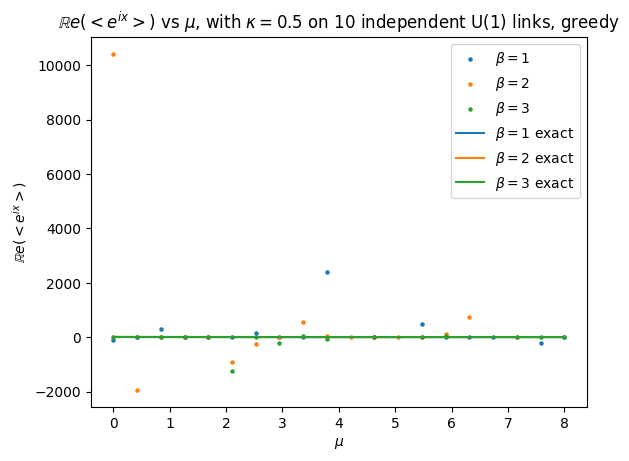

In [9]:
plt.scatter(mu, np.real(y_greedy[0]), label=r"$\beta = 1$", s=5)
plt.scatter(mu, np.real(y_greedy[1]), label=r"$\beta = 2$", s=5)
plt.scatter(mu, np.real(y_greedy[2]), label=r"$\beta = 3$", s=5)

plt.plot(mu, np.real(y_1_exact), label=r"$\beta = 1$ exact")
plt.plot(mu, np.real(y_2_exact), label=r"$\beta = 2$ exact")
plt.plot(mu, np.real(y_3_exact), label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu$")
plt.ylabel(r"$\mathbb{R}e(<e^{ix}>)$")
plt.title(r"$\mathbb{R}e(<e^{ix}>)$ vs $\mu$, with $\kappa = 0.5$ on 10 independent U(1) links, greedy")
plt.legend()
plt.show()

In [10]:
y_mc = [[], [], []]

mu = np.linspace(0, 8, 20)
beta = [1.0, 2.0, 3.0]
k = 0.5
model = u1n()

link_count = 10


def one(x, **kwargs):
    return 1


for ind, b in enumerate(beta):
    for m in mu:

        def normalization_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one)

        def expectation_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.polyakov_loop)

        normalization = simple_mc(
            func=normalization_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=20,
        ).integrate(30000)

        expectation = simple_mc(
            func=expectation_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=20,
        ).integrate(30000)

        y_mc[ind].append(expectation / normalization)

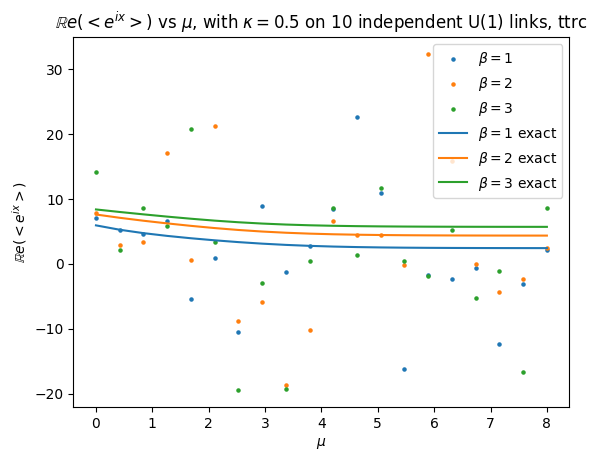

In [11]:
import matplotlib.pyplot as plt

y_1_exact = [link_count * obs.exp_polyakov_loop(beta=1, mu=m, k=k) for m in mu]
y_2_exact = [link_count * obs.exp_polyakov_loop(beta=2, mu=m, k=k) for m in mu]
y_3_exact = [link_count * obs.exp_polyakov_loop(beta=3, mu=m, k=k) for m in mu]


plt.scatter(mu, np.real(y_mc[0]), label=r"$\beta = 1$", s=5)
plt.scatter(mu, np.real(y_mc[1]), label=r"$\beta = 2$", s=5)
plt.scatter(mu, np.real(y_mc[2]), label=r"$\beta = 3$", s=5)

plt.plot(mu, np.real(y_1_exact), label=r"$\beta = 1$ exact")
plt.plot(mu, np.real(y_2_exact), label=r"$\beta = 2$ exact")
plt.plot(mu, np.real(y_3_exact), label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu$")
plt.ylabel(r"$\mathbb{R}e(<e^{ix}>)$")
plt.title(r"$\mathbb{R}e(<e^{ix}>)$ vs $\mu$, with $\kappa = 0.5$ on 10 independent U(1) links, ttrc")
plt.legend()
plt.show()

### Sum of Plaquette expected value for N independent U(1) links

In [4]:
y_ttrc = [[], [], []]

mu_i = 1j * np.linspace(-8, 0, 20)
mu_r = np.linspace(0, 8, 20)

mu = np.concatenate((mu_i, mu_r))

mu_squared = mu**2

beta = [1.0, 2.0, 3.0]
k = 0.5
model = u1n()

link_count = 10


def one(x, **kwargs):
    return 1


for ind, b in enumerate(beta):
    for m in mu:

        def normalization_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one)

        def expectation_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.plaquette)

        normalization = ttrc_integrator(
            func=normalization_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=10,
            sweeps=3,
            initial_bond_guess=2,
            max_bond=10,
            maxvol_tol=1e-5,
            truncation_tol=1e-10,
            is_f_complex=True,
        ).integrate()

        expectation = ttrc_integrator(
            func=expectation_func,
            num_variables=link_count,
            intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
            points_per_variable=10,
            sweeps=3,
            initial_bond_guess=2,
            max_bond=10,
            maxvol_tol=1e-5,
            truncation_tol=1e-10,
            is_f_complex=True,
        ).integrate()

        y_ttrc[ind].append(expectation / normalization)

Initialization done after time: 0.014528751373291016 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.02909088134765625 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.03324747085571289 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.03454160690307617 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.03363656997680664 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.031241416931152344 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.03248429298400879 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.042514801025390625 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.035826683044433594 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.030331850051879883 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after

/home/ptbadia/miniconda3/envs/tfg/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ptbadia/miniconda3/envs/tfg/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/home/ptbadia/miniconda3/envs/tfg/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


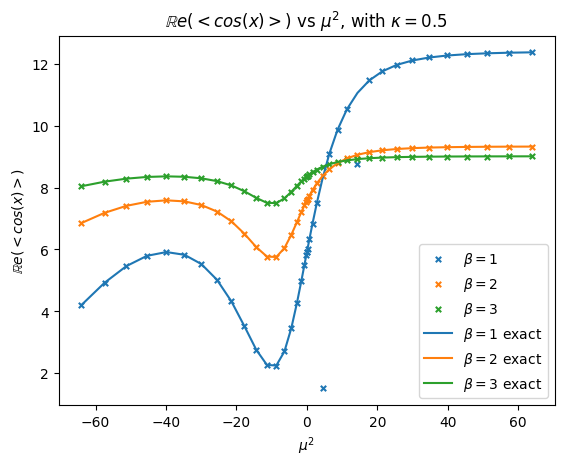

In [5]:
y_1_exact = [link_count * obs.exp_plaquette(beta=1, mu=m, k=k) for m in mu]
y_2_exact = [link_count * obs.exp_plaquette(beta=2, mu=m, k=k) for m in mu]
y_3_exact = [link_count * obs.exp_plaquette(beta=3, mu=m, k=k) for m in mu]

plt.scatter(mu_squared, y_ttrc[0], label=r"$\beta = 1$", s=15, marker="x")
plt.scatter(mu_squared, y_ttrc[1], label=r"$\beta = 2$", s=15, marker="x")
plt.scatter(mu_squared, y_ttrc[2], label=r"$\beta = 3$", s=15, marker="x")

plt.plot(mu_squared, y_1_exact, label=r"$\beta = 1$ exact")
plt.plot(mu_squared, y_2_exact, label=r"$\beta = 2$ exact")
plt.plot(mu_squared, y_3_exact, label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu^2$")
plt.ylabel(r"$\mathbb{R}e(<cos(x)>)$")
plt.title(r"$\mathbb{R}e(<cos(x)>)$ vs $\mu^2$, with $\kappa = 0.5$")
plt.legend()
plt.show()

In [6]:
y_greedy = [[], [], []]

for ind, b in enumerate(beta):
    for m in mu:

        def normalization_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=one)

        def expectation_func(x_arr):
            return model.expectation_weight(x_arr, beta=b, k=k, mu=m, operator=obs.density)

        try:
            normalization = greedy_cross_integrator(
                func=normalization_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=20,
                sweeps=6,
                max_bond=10,
                pivot_finder_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            expectation = greedy_cross_integrator(
                func=expectation_func,
                num_variables=link_count,
                intervals=np.array([[-np.pi, np.pi] for i in range(link_count)]),
                points_per_variable=20,
                sweeps=6,
                max_bond=10,
                pivot_finder_tol=1e-10,
                is_f_complex=True,
            ).integrate()

            y_greedy[ind].append(expectation / normalization)

        except:
            y_greedy[ind].append(np.nan)

Initialization done after time: 0.0004904270172119141 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.001428365707397461 seconds and 1 tries.
Sweep 1
Sweep 2
Initialization done after time: 0.0004591941833496094 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0004956722259521484 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Initialization done after time: 0.0003693103790283203 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0007228851318359375 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Sweep 5
Initialization done after time: 0.00042057037353515625 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.0004417896270751953 seconds and 1 tries.
Sweep 1
Sweep 2
Initialization done after time: 0.00040459632873535156 seconds and 1 tries.
Sweep 1
Initialization done after time: 0.001195669174194336 seconds and 1 tries.
Sweep 1
Sweep 2
Sweep 3
Sweep 4
Initialization done after time: 0.0004184246063232422 seconds and 1 tries.
Sweep 1

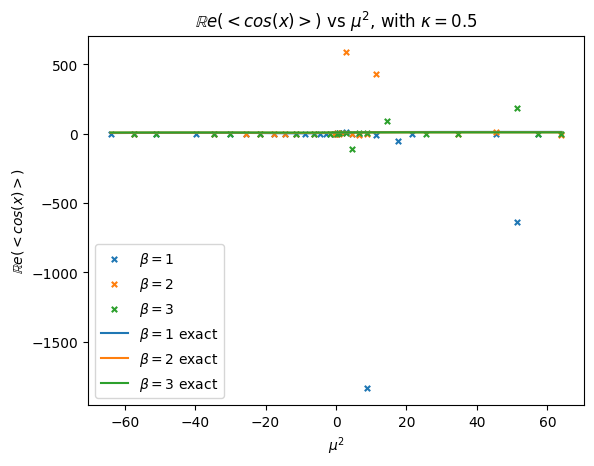

In [10]:
y_1_exact = [link_count * obs.exp_plaquette(beta=1, mu=m, k=k) for m in mu]
y_2_exact = [link_count * obs.exp_plaquette(beta=2, mu=m, k=k) for m in mu]
y_3_exact = [link_count * obs.exp_plaquette(beta=3, mu=m, k=k) for m in mu]

plt.scatter(mu_squared, np.real(y_greedy[0]), label=r"$\beta = 1$", s=15, marker="x")
plt.scatter(mu_squared, np.real(y_greedy[1]), label=r"$\beta = 2$", s=15, marker="x")
plt.scatter(mu_squared, np.real(y_greedy[2]), label=r"$\beta = 3$", s=15, marker="x")

plt.plot(mu_squared, y_1_exact, label=r"$\beta = 1$ exact")
plt.plot(mu_squared, y_2_exact, label=r"$\beta = 2$ exact")
plt.plot(mu_squared, y_3_exact, label=r"$\beta = 3$ exact")

plt.xlabel(r"$\mu^2$")
plt.ylabel(r"$\mathbb{R}e(<cos(x)>)$")
plt.title(r"$\mathbb{R}e(<cos(x)>)$ vs $\mu^2$, with $\kappa = 0.5$")
plt.legend()
plt.show()